# LCZ classification

## Load and prepare the dataset

In [1]:
#preparing the dataset for classification task
import os
import numpy as np
from skimage.io import imread

def load_data(data_dir, train_pct=0.7, val_pct=0.15, test_pct=0.15):
    classes = os.listdir(data_dir)
    class_names = {}  # Create an empty dictionary to store the mapping
    x = []
    y = []
    desired_order = ['1', '2', '3', '4', '5', '6', '8', '9', '10', 'A', 'B', 'D', 'E', 'F', 'G']
    
    for class_name in desired_order:
        if class_name in classes:
            class_folder = class_name
            class_index = desired_order.index(class_name)
            class_path = os.path.join(data_dir, class_folder)
            class_names[class_index] = class_folder  # Store the mapping between index and subfolder name
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = imread(img_path)
                x.append(img)
                y.append(class_index)
    
    x = np.array(x)
    y = np.array(y)  # convert to numpy array

    # Shuffle the data
    num_samples = len(y)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    x = x[indices]
    y = y[indices]

    # Split the data into train, validation, and test sets
    train_size = int(num_samples * train_pct)
    val_size = int(num_samples * val_pct)
    test_size = num_samples - train_size - val_size

    X_train = x[:train_size]
    y_train = y[:train_size]
    X_val = x[train_size:train_size + val_size]
    y_val = y[train_size:train_size + val_size]
    X_test = x[train_size + val_size:]
    y_test = y[train_size + val_size:]

    return X_train, y_train, X_val, y_val, X_test, y_test, class_names

# load the data and get the class names
data_dir = 'Amsterdam_Sen2_Patches'
X_train, y_train, X_val, y_val, X_test, y_test, class_names = load_data(data_dir)

# Print the class labels and indices
for index, class_label in class_names.items():
    print(f"Index: {index}, Class Label: {class_label}")


Index: 0, Class Label: 1
Index: 1, Class Label: 2
Index: 2, Class Label: 3
Index: 3, Class Label: 4
Index: 4, Class Label: 5
Index: 5, Class Label: 6
Index: 6, Class Label: 8
Index: 7, Class Label: 9
Index: 8, Class Label: 10
Index: 9, Class Label: A
Index: 10, Class Label: B
Index: 11, Class Label: D
Index: 12, Class Label: E
Index: 13, Class Label: F
Index: 14, Class Label: G


In [ ]:
# Alternative for preparing the dataset based on train/val/test polygons (**were not used in the final training**)
import os
import numpy as np
from skimage.io import imread
from tensorflow.keras.utils import to_categorical

train_dir = 'Amsterdam_Sen2_train_Patches'
val_dir = 'Amsterdam_Sen2_valid_Patches'
test_dir = 'Amsterdam_Sen2_test_Patches'

def load_data(data_dir):
    classes = os.listdir(data_dir)
    if '.ipynb_checkpoints' in classes:
        classes.remove('.ipynb_checkpoints')  # Exclude the '.ipynb_checkpoints' directory
    class_names = {}  # Create an empty dictionary to store the mapping
    # Sort the class names based on the desired order
    desired_order = ['1', '2', '3', '4', '5', '6', '8', '9', '10', 'A', 'B', 'D', 'E', 'F', 'G']
    sorted_class_names = sorted(classes, key=lambda x: desired_order.index(x))
    x = []
    y = []
    for index, class_folder in enumerate(sorted_class_names):
        class_path = os.path.join(data_dir, class_folder)
        class_names[index] = class_folder  # Store the mapping between index and subfolder name
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            if os.path.isfile(img_path):  # Check if the path is a file
                img = imread(img_path)
                x.append(img)
                y.append(index)
    x = np.array(x)
    y = np.array(y)  # convert to numpy array

    return x, y, class_names

# Load the training, validation, and test datasets
X_train, y_train, class_names = load_data(train_dir)
X_val, y_val, class_names = load_data(val_dir)
X_test, y_test, class_names = load_data(test_dir)

In [2]:
# load the data and get the class names
data_dir = 'Amsterdam_Sen2_Patches_stride16'
X_train, y_train, X_val, y_val, X_test, y_test, class_names = load_data(data_dir)


In [3]:
# Print the class labels and indices
for index, class_label in class_names.items():
    print(f"Index: {index}, Class Label: {class_label}")

Index: 0, Class Label: 1
Index: 1, Class Label: 2
Index: 2, Class Label: 3
Index: 3, Class Label: 4
Index: 4, Class Label: 5
Index: 5, Class Label: 6
Index: 6, Class Label: 8
Index: 7, Class Label: 9
Index: 8, Class Label: 10
Index: 9, Class Label: A
Index: 10, Class Label: B
Index: 11, Class Label: D
Index: 12, Class Label: E
Index: 13, Class Label: F
Index: 14, Class Label: G


In [4]:
print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)
print('Validation data shape:', X_val.shape)
print('Validation labels shape:', y_val.shape)
print('Testing data shape:', X_test.shape)
print('Testing labels shape:', y_test.shape)


Training data shape: (1072, 32, 32, 10)
Training labels shape: (1072,)
Validation data shape: (229, 32, 32, 10)
Validation labels shape: (229,)
Testing data shape: (231, 32, 32, 10)
Testing labels shape: (231,)


In [5]:
import numpy as np
import pandas as pd

# Count the samples per class in the training set
train_counts = np.bincount(y_train)

# Count the samples per class in the validation set
val_counts = np.bincount(y_val)

# Count the samples per class in the test set
test_counts = np.bincount(y_test)

# Combine the counts into a single table
class_counts = []
for class_index, class_name in class_names.items():
    train_count = train_counts[class_index]
    val_count = val_counts[class_index]
    test_count = test_counts[class_index]
    class_counts.append([class_name, train_count, val_count, test_count])

# Convert the class_counts list into a pandas DataFrame
df = pd.DataFrame(class_counts, columns=["Class", "Train Count", "Validation Count", "Test Count"])

# Save the DataFrame as a CSV file
df.to_csv('class_counts.csv', index=False)
print(df)

   Class  Train Count  Validation Count  Test Count
0      1           31                 7           9
1      2           99                13          24
2      3           19                 3           4
3      4           70                11          17
4      5          110                15          15
5      6           70                15          10
6      8           91                23          33
7      9           46                 5          10
8     10           46                13           5
9      A           59                10          12
10     B           47                13          10
11     D          128                31          38
12     E           81                27          15
13     F           24                 8           6
14     G          151                35          23


## Author Model

In [39]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./np.max(X_train)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),  
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=15, activation='softmax')
])

# Build the model
model.build(input_shape=(None, 32, 32, 10))  # Replace height, width, and channels with the appropriate values

# Print the model summary
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 32, 32, 10)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        2912      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_7   (None, 64)              

In [31]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Rescaling(1./np.max(X_train)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),  
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=15, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=300, verbose=1)
checkpoint = ModelCheckpoint('mymodel_weights.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit the generator on your training data
datagen.fit(X_train)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=500,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint]
)

# Save the trained model
model.save('mymodel1')

# Load the best weights
model.load_weights('mymodel_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Best Model Test accuracy:', test_acc)


Epoch 1/500


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1874: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1072, 32, 32, 10) (10 channels).
  warnings.warn('Expected input to be images (as Numpy array) '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:680: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1072, 32, 32, 10) (10 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


34/34 [==============================] - ETA: 0s - loss: 2.6227 - accuracy: 0.1353
Epoch 1: val_accuracy improved from -inf to 0.13537, saving model to mymodel_weights.h5
34/34 [==============================] - 7s 204ms/step - loss: 2.6227 - accuracy: 0.1353 - val_loss: 2.4859 - val_accuracy: 0.1354
Epoch 2/500
33/34 [============================>.] - ETA: 0s - loss: 2.4151 - accuracy: 0.2577
Epoch 2: val_accuracy improved from 0.13537 to 0.34061, saving model to mymodel_weights.h5
34/34 [==============================] - 2s 64ms/step - loss: 2.4097 - accuracy: 0.2612 - val_loss: 2.1924 - val_accuracy: 0.3406
Epoch 3/500
34/34 [==============================] - ETA: 0s - loss: 2.1309 - accuracy: 0.3209
Epoch 3: val_accuracy improved from 0.34061 to 0.34934, saving model to mymodel_weights.h5
34/34 [==============================] - 2s 49ms/step - loss: 2.1309 - accuracy: 0.3209 - val_loss: 1.8875 - val_accuracy: 0.3493
Epoch 4/500
33/34 [============================>.] - ETA: 0s - los

INFO:tensorflow:Assets written to: mymodel1/assets


INFO:tensorflow:Assets written to: mymodel1/assets


8/8 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.7619
Best Model Test accuracy: 0.761904776096344


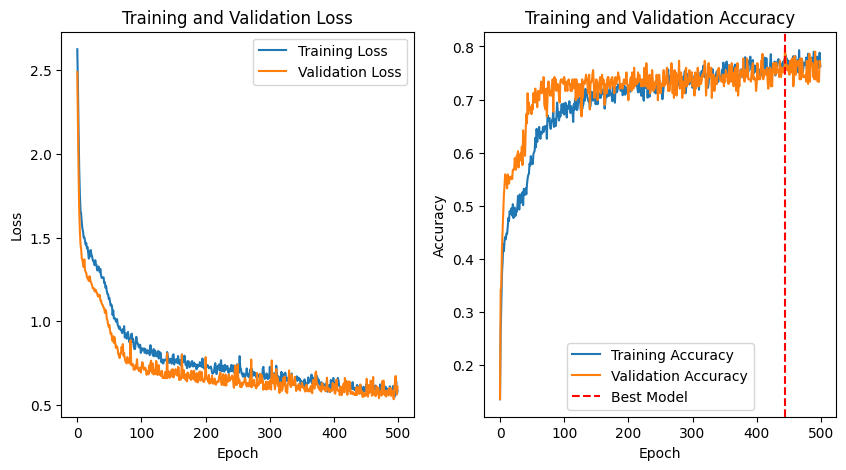

best epoch accuracy:  0.7947598099708557
best epoch number:  444


In [36]:
import matplotlib.pyplot as plt

# Retrieve the best epoch value
best_epoch = checkpoint.best

# Find the index of the maximum validation accuracy
best_epoch_index = np.argmax(history.history['val_accuracy'])

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.axvline(x=best_epoch_index, color='red', linestyle='--', label='Best Model')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.show()

print('best epoch accuracy: ', best_epoch)
print('best epoch number: ', best_epoch_index)

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming you have already created a graph and displayed it in Jupyter Notebook
# Save the current figure
plt.savefig('train_metrics_mymodel.jpg', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [10]:
# Get the class labels from the class_names dictionary

class_labels = [class_names[i] for i in range(len(class_names))]
class_labels

['1', '2', '3', '4', '5', '6', '8', '9', '10', 'A', 'B', 'D', 'E', 'F', 'G']

In [46]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('mymodel1')

# Load the best weights
model.load_weights('mymodel_weights1.h5')

In [38]:
# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the overall accuracy
correct_predictions = np.sum(y_pred == y_test)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

print("Overall Accuracy on Test Set:", accuracy)


8/8 [==============================] - 0s 2ms/step
Overall Accuracy on Test Set: 0.7619047619047619


In [39]:
from sklearn.metrics import classification_report

# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred, target_names=class_labels)

print(classification_metrics)

              precision    recall  f1-score   support

           1       0.50      0.44      0.47         9
           2       0.71      0.77      0.74        22
           3       0.00      0.00      0.00         3
           4       0.48      0.63      0.55        19
           5       0.72      0.76      0.74        17
           6       0.80      0.52      0.63        23
           8       0.71      0.77      0.74        22
           9       0.93      1.00      0.96        13
          10       0.50      0.14      0.22         7
           A       0.73      0.67      0.70        12
           B       0.69      0.69      0.69        13
           D       0.96      1.00      0.98        25
           E       0.73      0.94      0.82        17
           F       1.00      1.00      1.00         6
           G       1.00      1.00      1.00        23

    accuracy                           0.76       231
   macro avg       0.70      0.69      0.68       231
weighted avg       0.75   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/tmp/ipykernel_139836/2766485175.py:21: RuntimeWarning: invalid value encountered in divide
  false_positive_rates = false_positives / np.sum(cm, axis=0)


Accuracy for 1: 0.4444444444444444
Accuracy for 2: 0.7727272727272727
Accuracy for 3: 0.0
Accuracy for 4: 0.631578947368421
Accuracy for 5: 0.7647058823529411
Accuracy for 6: 0.5217391304347826
Accuracy for 8: 0.7727272727272727
Accuracy for 9: 1.0
Accuracy for 10: 0.14285714285714285
Accuracy for A: 0.6666666666666666
Accuracy for B: 0.6923076923076923
Accuracy for D: 1.0
Accuracy for E: 0.9411764705882353
Accuracy for F: 1.0
Accuracy for G: 1.0
Total Accuracy: 0.7619047619047619
False positive rate for 1: 0.5
False negative rate for 1: 0.5555555555555556
True positive rate for 1: 0.4444444444444444
True negative rate for 1: 0.9437229437229437

False positive rate for 2: 0.2916666666666667
False negative rate for 2: 0.22727272727272727
True positive rate for 2: 0.7727272727272727
True negative rate for 2: 0.8744588744588745

False positive rate for 3: nan
False negative rate for 3: 1.0
True positive rate for 3: 0.0
True negative rate for 3: 0.987012987012987

False positive rate for 4

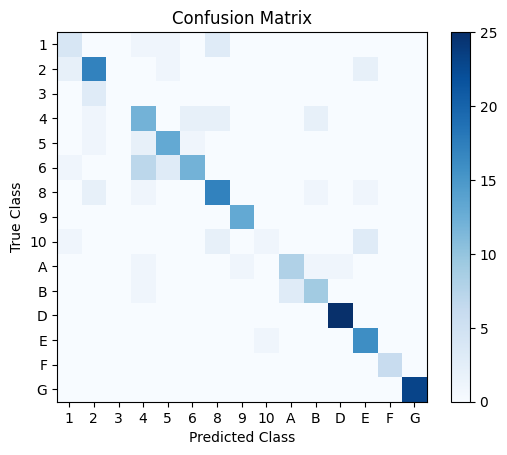

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy for each class
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Calculate total accuracy
total_accuracy = np.trace(cm) / np.sum(cm)

# Calculate false positives, false negatives, true positives, and true negatives
false_positives = np.sum(cm, axis=0) - np.diag(cm)
false_negatives = np.sum(cm, axis=1) - np.diag(cm)
true_positives = np.diag(cm)
true_negatives = np.sum(cm) - (false_positives + false_negatives + true_positives)

# Calculate percentages of false positives, false negatives, true positives, and true negatives
false_positive_rates = false_positives / np.sum(cm, axis=0)
false_negative_rates = false_negatives / np.sum(cm, axis=1)
true_positive_rates = true_positives / np.sum(cm, axis=1)
true_negative_rates = true_negatives / np.sum(cm)

# Print the accuracy for each class
for i, label in enumerate(class_labels):
    print(f"Accuracy for {label}: {class_accuracy[i]}")

# Print the total accuracy
print(f"Total Accuracy: {total_accuracy}")

# Print the percentages of false positives, false negatives, true positives, and true negatives for each class
for i, label in enumerate(class_labels):
    print(f"False positive rate for {label}: {false_positive_rates[i]}")
    print(f"False negative rate for {label}: {false_negative_rates[i]}")
    print(f"True positive rate for {label}: {true_positive_rates[i]}")
    print(f"True negative rate for {label}: {true_negative_rates[i]}")
    print()

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


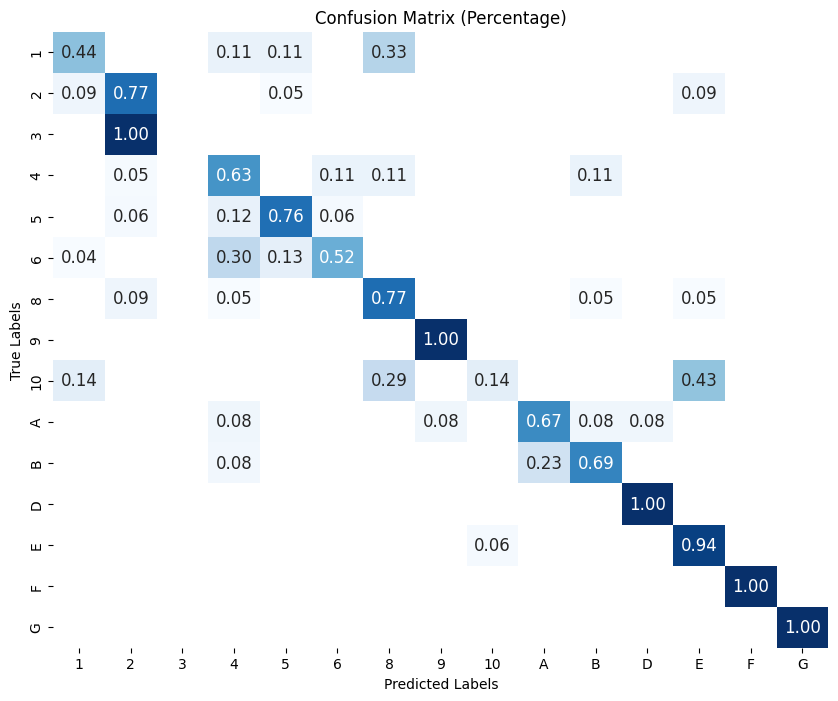

      1    2    3    4    5    6    8    9   10    A    B    D    E    F    G
1  0.44 0.00 0.00 0.11 0.11 0.00 0.33 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2  0.09 0.77 0.00 0.00 0.05 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.09 0.00 0.00
3  0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
4  0.00 0.05 0.00 0.63 0.00 0.11 0.11 0.00 0.00 0.00 0.11 0.00 0.00 0.00 0.00
5  0.00 0.06 0.00 0.12 0.76 0.06 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
6  0.04 0.00 0.00 0.30 0.13 0.52 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
8  0.00 0.09 0.00 0.05 0.00 0.00 0.77 0.00 0.00 0.00 0.05 0.00 0.05 0.00 0.00
9  0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
10 0.14 0.00 0.00 0.00 0.00 0.00 0.29 0.00 0.14 0.00 0.00 0.00 0.43 0.00 0.00
A  0.00 0.00 0.00 0.08 0.00 0.00 0.00 0.08 0.00 0.67 0.08 0.08 0.00 0.00 0.00
B  0.00 0.00 0.00 0.08 0.00 0.00 0.00 0.00 0.00 0.23 0.69 0.00 0.00 0.00 0.00
D  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix to get percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


# Display confusion matrix as a heatmap with percentage values
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, cbar=False, annot_kws={"size": 12}, mask=(cm_normalized == 0))


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Convert confusion matrix to pandas DataFrame
df_cm = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)

# Display the table as a formatted string for copying
table_string = df_cm.to_string(float_format="{:.2f}".format)
print(table_string)

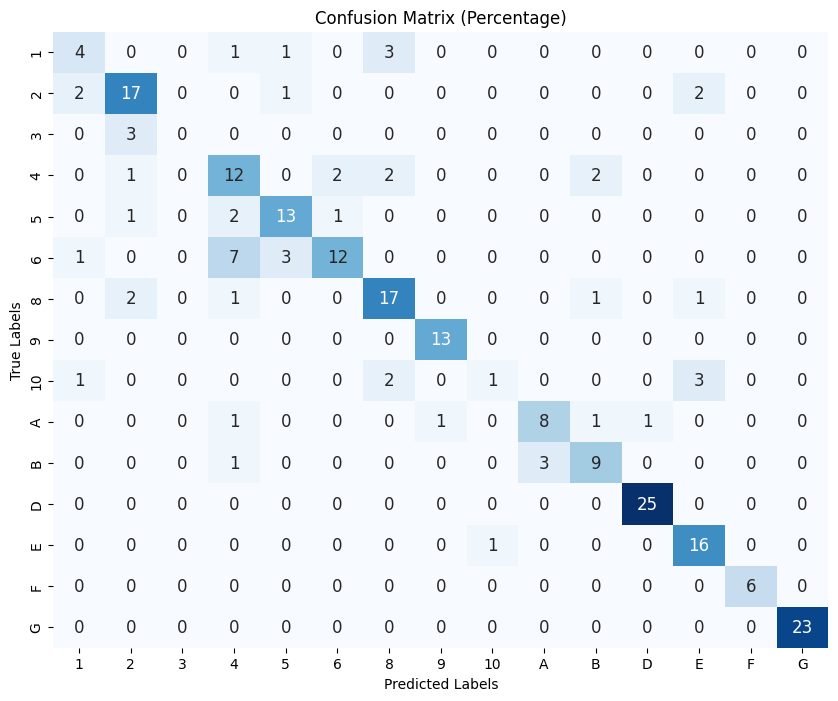

    1   2  3   4   5   6   8   9  10  A  B   D   E  F   G
1   4   0  0   1   1   0   3   0   0  0  0   0   0  0   0
2   2  17  0   0   1   0   0   0   0  0  0   0   2  0   0
3   0   3  0   0   0   0   0   0   0  0  0   0   0  0   0
4   0   1  0  12   0   2   2   0   0  0  2   0   0  0   0
5   0   1  0   2  13   1   0   0   0  0  0   0   0  0   0
6   1   0  0   7   3  12   0   0   0  0  0   0   0  0   0
8   0   2  0   1   0   0  17   0   0  0  1   0   1  0   0
9   0   0  0   0   0   0   0  13   0  0  0   0   0  0   0
10  1   0  0   0   0   0   2   0   1  0  0   0   3  0   0
A   0   0  0   1   0   0   0   1   0  8  1   1   0  0   0
B   0   0  0   1   0   0   0   0   0  3  9   0   0  0   0
D   0   0  0   0   0   0   0   0   0  0  0  25   0  0   0
E   0   0  0   0   0   0   0   0   1  0  0   0  16  0   0
F   0   0  0   0   0   0   0   0   0  0  0   0   0  6   0
G   0   0  0   0   0   0   0   0   0  0  0   0   0  0  23


In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Display confusion matrix as a heatmap with count values
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels, cbar=False, annot_kws={"size": 12})


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Convert confusion matrix to pandas DataFrame
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Display the table as a formatted string for copying
table_string = df_cm.to_string(float_format="{:.2f}".format)
print(table_string)


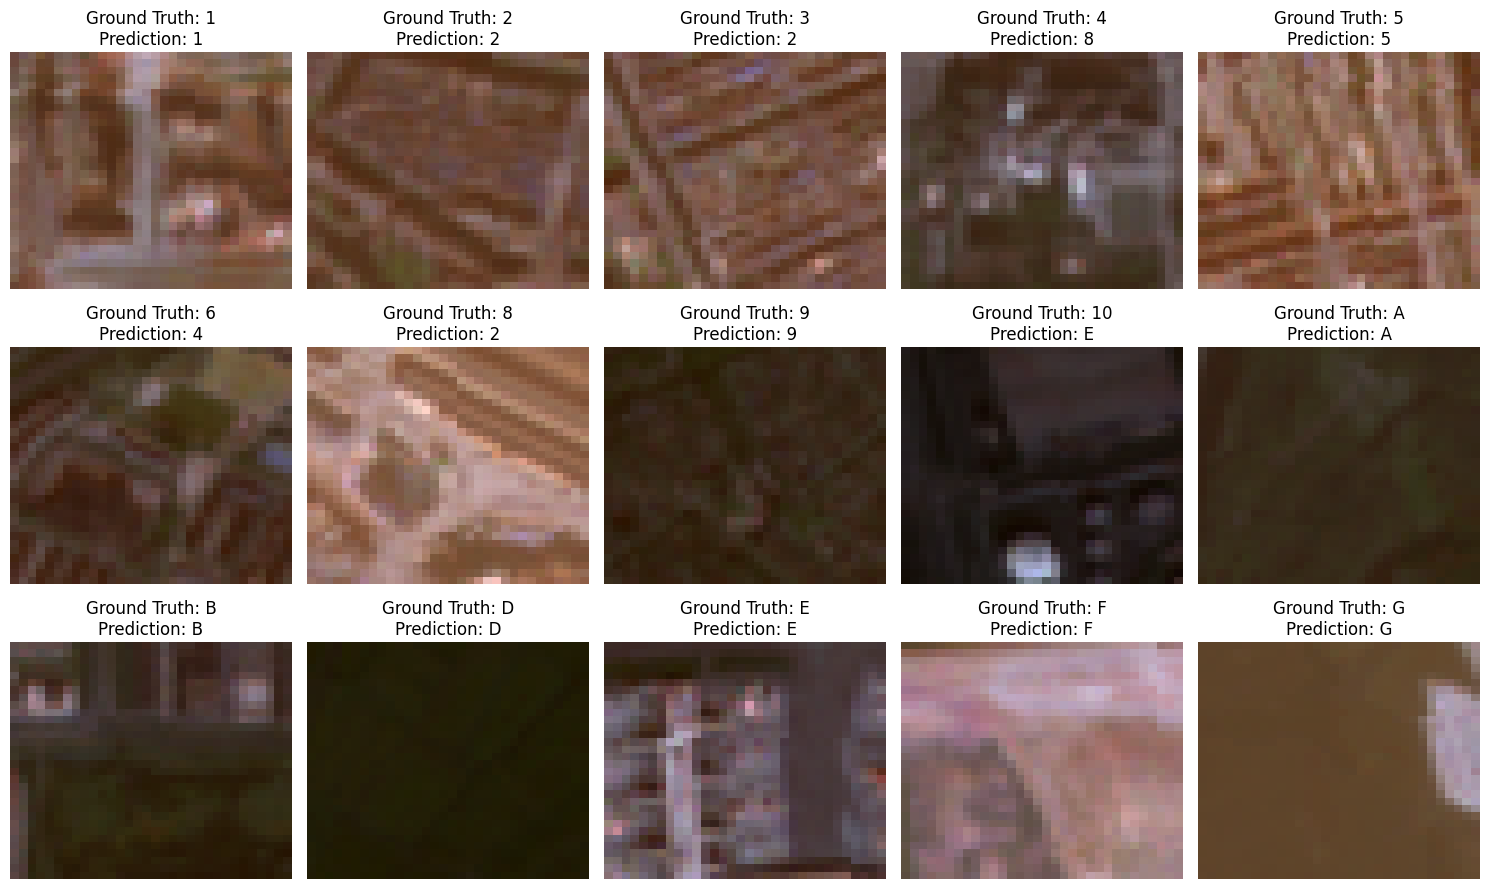

In [43]:
import matplotlib.pyplot as plt

# Make predictions using the loaded model
# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels if needed

# Select one sample per class label
selected_indices = []
for label in range(len(class_labels)):
    indices = np.where(y_test == label)[0]
    selected_index = np.random.choice(indices)
    selected_indices.append(selected_index)

# Create a 3x5 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

# Iterate over the selected samples and plot them
for i, index in enumerate(selected_indices):
    row_idx = i // 5
    col_idx = i % 5

    # Plot the image
    image = X_test[index]
    # Normalize intensity levels to 0-255 range
    image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    axes[row_idx, col_idx].imshow(image[:, :, :3].astype('uint8'), aspect='auto', interpolation='none')  # Display only the first three channels
    axes[row_idx, col_idx].set_title("Ground Truth: {}\nPrediction: {}".format(class_labels[y_test[index]], class_labels[y_pred[index]]))
    axes[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.show()


# Resnet-50 model

In [40]:
import tensorflow as tf

# Define the input shape
input_shape = (32, 32, 10)

# Create a new input layer
input_layer = Input(shape=input_shape)

# Load the ResNet50 model, using the new input layer
resnet_model = ResNet50(include_top=False, weights=None, input_tensor=input_layer, classes=15)

# Add the Rescaling layer to the top
model = tf.keras.Sequential([
    resnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='softmax')
])

# Build the model
model.build(input_shape=(None, 32, 32, 10))  # Replace height, width, and channels with the appropriate values

# Print the model summary
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23609664  
                                                                 
 global_average_pooling2d_8   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 128)               262272    
                                                                 
 dense_17 (Dense)            (None, 15)                1935      
                                                                 
Total params: 23,873,871
Trainable params: 23,820,751
Non-trainable params: 53,120
_________________________________________________________________


In [6]:
#Training with Resnet50

import tensorflow as tf
from tensorflow.keras.layers import Input, Rescaling
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

from tensorflow.keras.applications.resnet50 import preprocess_input

# Define the input shape
input_shape = (32, 32, 10)

# Create a new input layer
input_layer = Input(shape=input_shape)

# Load the ResNet50 model, using the new input layer
resnet_model = ResNet50(include_top=False, weights=None, input_tensor=input_layer, classes=15)

#X_train = preprocess_input(X_train)

# Add the Rescaling layer to the top
model = tf.keras.Sequential([
    resnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=450, verbose=1)
checkpoint = ModelCheckpoint('weights_resnet50.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit the generator on your training data
datagen.fit(X_train)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=500,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint]
)

# Save the trained model
model.save('model_resnet50')

# Load the best weights
model.load_weights('weights_resnet50.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Best Model Test accuracy:', test_acc)


2023-06-24 10:46:07.870079: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1874: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1072, 32, 32, 10) (10 channels).
  warnings.warn('Expected input to be images (as Numpy array) '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:680: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1072, 32, 32, 10) (10 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


Epoch 1/500
34/34 [==============================] - ETA: 0s - loss: 2.0812 - accuracy: 0.4058
Epoch 1: val_accuracy improved from -inf to 0.13725, saving model to best_model_weights98.h5
34/34 [==============================] - 23s 216ms/step - loss: 2.0812 - accuracy: 0.4058 - val_loss: 51.6789 - val_accuracy: 0.1373
Epoch 2/500
34/34 [==============================] - ETA: 0s - loss: 1.3035 - accuracy: 0.5392
Epoch 2: val_accuracy improved from 0.13725 to 0.16993, saving model to best_model_weights98.h5
34/34 [==============================] - 5s 134ms/step - loss: 1.3035 - accuracy: 0.5392 - val_loss: 2.4819 - val_accuracy: 0.1699
Epoch 3/500
34/34 [==============================] - ETA: 0s - loss: 1.2707 - accuracy: 0.5504
Epoch 3: val_accuracy did not improve from 0.16993
34/34 [==============================] - 3s 75ms/step - loss: 1.2707 - accuracy: 0.5504 - val_loss: 2.8456 - val_accuracy: 0.0948
Epoch 4/500
33/34 [============================>.] - ETA: 0s - loss: 1.1573 - acc

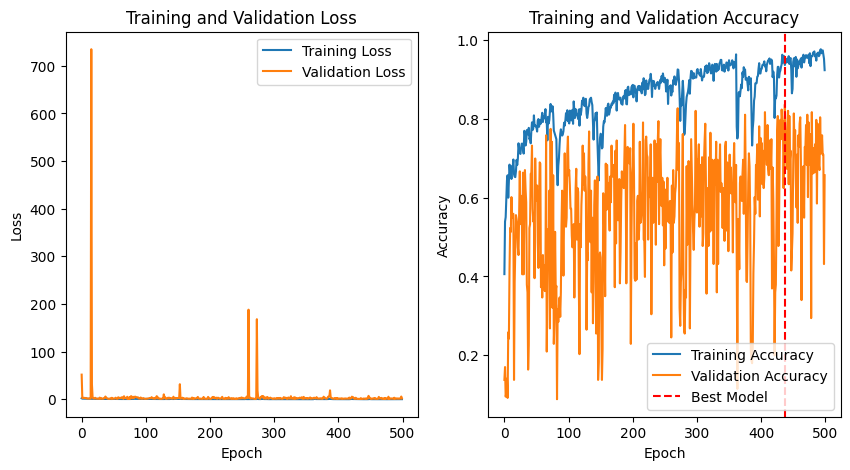

best epoch accuracy:  0.8366013169288635
best epoch number:  437


In [7]:
import matplotlib.pyplot as plt

# Retrieve the best epoch value
best_epoch = checkpoint.best

# Find the index of the maximum validation accuracy
best_epoch_index = np.argmax(history.history['val_accuracy'])

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.axvline(x=best_epoch_index, color='red', linestyle='--', label='Best Model')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.show()

print('best epoch accuracy: ', best_epoch)
print('best epoch number: ', best_epoch_index)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming you have already created a graph and displayed it in Jupyter Notebook
# Save the current figure
plt.savefig('graph_image.png')


<Figure size 640x480 with 0 Axes>

In [6]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('model_resnet50')

# Load the best weights
model.load_weights('weights_resnet50.h5')

2023-06-26 13:35:44.432475: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


In [7]:
# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the overall accuracy
correct_predictions = np.sum(y_pred == y_test)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

print("Overall Accuracy on Test Set:", accuracy)


8/8 [==============================] - 5s 54ms/step
Overall Accuracy on Test Set: 0.8874458874458875


In [11]:
from sklearn.metrics import classification_report

# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred, target_names=class_labels)

print(classification_metrics)

              precision    recall  f1-score   support

           1       1.00      0.89      0.94         9
           2       1.00      0.75      0.86        24
           3       1.00      0.25      0.40         4
           4       0.92      0.71      0.80        17
           5       0.54      1.00      0.70        15
           6       0.58      0.70      0.64        10
           8       0.92      1.00      0.96        33
           9       0.90      0.90      0.90        10
          10       1.00      0.40      0.57         5
           A       0.91      0.83      0.87        12
           B       0.80      0.80      0.80        10
           D       1.00      1.00      1.00        38
           E       1.00      1.00      1.00        15
           F       1.00      1.00      1.00         6
           G       1.00      1.00      1.00        23

    accuracy                           0.89       231
   macro avg       0.90      0.82      0.83       231
weighted avg       0.92   

Accuracy for 1: 0.8888888888888888
Accuracy for 2: 0.75
Accuracy for 3: 0.25
Accuracy for 4: 0.7058823529411765
Accuracy for 5: 1.0
Accuracy for 6: 0.7
Accuracy for 8: 1.0
Accuracy for 9: 0.9
Accuracy for 10: 0.4
Accuracy for A: 0.8333333333333334
Accuracy for B: 0.8
Accuracy for D: 1.0
Accuracy for E: 1.0
Accuracy for F: 1.0
Accuracy for G: 1.0
Total Accuracy: 0.8874458874458875
False positive rate for 1: 0.0
False negative rate for 1: 0.1111111111111111
True positive rate for 1: 0.8888888888888888
True negative rate for 1: 0.961038961038961

False positive rate for 2: 0.0
False negative rate for 2: 0.25
True positive rate for 2: 0.75
True negative rate for 2: 0.8961038961038961

False positive rate for 3: 0.0
False negative rate for 3: 0.75
True positive rate for 3: 0.25
True negative rate for 3: 0.9826839826839827

False positive rate for 4: 0.07692307692307693
False negative rate for 4: 0.29411764705882354
True positive rate for 4: 0.7058823529411765
True negative rate for 4: 0.922

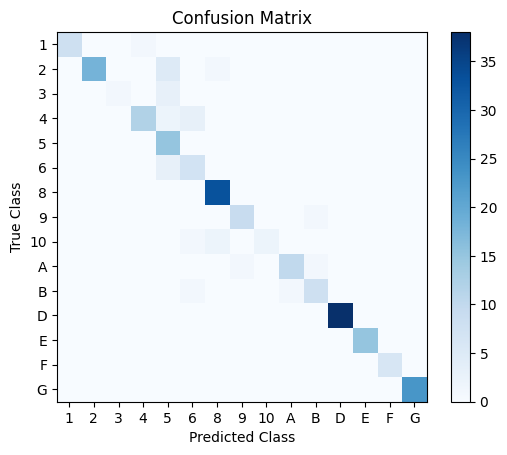

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy for each class
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Calculate total accuracy
total_accuracy = np.trace(cm) / np.sum(cm)

# Calculate false positives, false negatives, true positives, and true negatives
false_positives = np.sum(cm, axis=0) - np.diag(cm)
false_negatives = np.sum(cm, axis=1) - np.diag(cm)
true_positives = np.diag(cm)
true_negatives = np.sum(cm) - (false_positives + false_negatives + true_positives)

# Calculate percentages of false positives, false negatives, true positives, and true negatives
false_positive_rates = false_positives / np.sum(cm, axis=0)
false_negative_rates = false_negatives / np.sum(cm, axis=1)
true_positive_rates = true_positives / np.sum(cm, axis=1)
true_negative_rates = true_negatives / np.sum(cm)

# Print the accuracy for each class
for i, label in enumerate(class_labels):
    print(f"Accuracy for {label}: {class_accuracy[i]}")

# Print the total accuracy
print(f"Total Accuracy: {total_accuracy}")

# Print the percentages of false positives, false negatives, true positives, and true negatives for each class
for i, label in enumerate(class_labels):
    print(f"False positive rate for {label}: {false_positive_rates[i]}")
    print(f"False negative rate for {label}: {false_negative_rates[i]}")
    print(f"True positive rate for {label}: {true_positive_rates[i]}")
    print(f"True negative rate for {label}: {true_negative_rates[i]}")
    print()

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


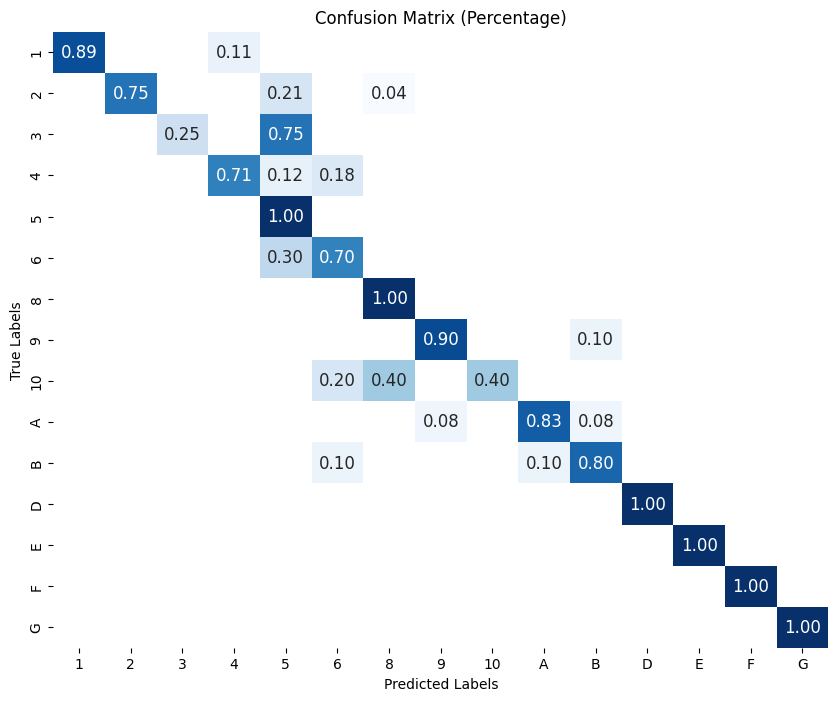

      1    2    3    4    5    6    8    9   10    A    B    D    E    F    G
1  0.89 0.00 0.00 0.11 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2  0.00 0.75 0.00 0.00 0.21 0.00 0.04 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
3  0.00 0.00 0.25 0.00 0.75 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
4  0.00 0.00 0.00 0.71 0.12 0.18 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
5  0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
6  0.00 0.00 0.00 0.00 0.30 0.70 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
8  0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
9  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.90 0.00 0.00 0.10 0.00 0.00 0.00 0.00
10 0.00 0.00 0.00 0.00 0.00 0.20 0.40 0.00 0.40 0.00 0.00 0.00 0.00 0.00 0.00
A  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.08 0.00 0.83 0.08 0.00 0.00 0.00 0.00
B  0.00 0.00 0.00 0.00 0.00 0.10 0.00 0.00 0.00 0.10 0.80 0.00 0.00 0.00 0.00
D  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix to get percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


# Display confusion matrix as a heatmap with percentage values
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, cbar=False, annot_kws={"size": 12}, mask=(cm_normalized == 0))


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Convert confusion matrix to pandas DataFrame
df_cm = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)

# Display the table as a formatted string for copying
table_string = df_cm.to_string(float_format="{:.2f}".format)
print(table_string)

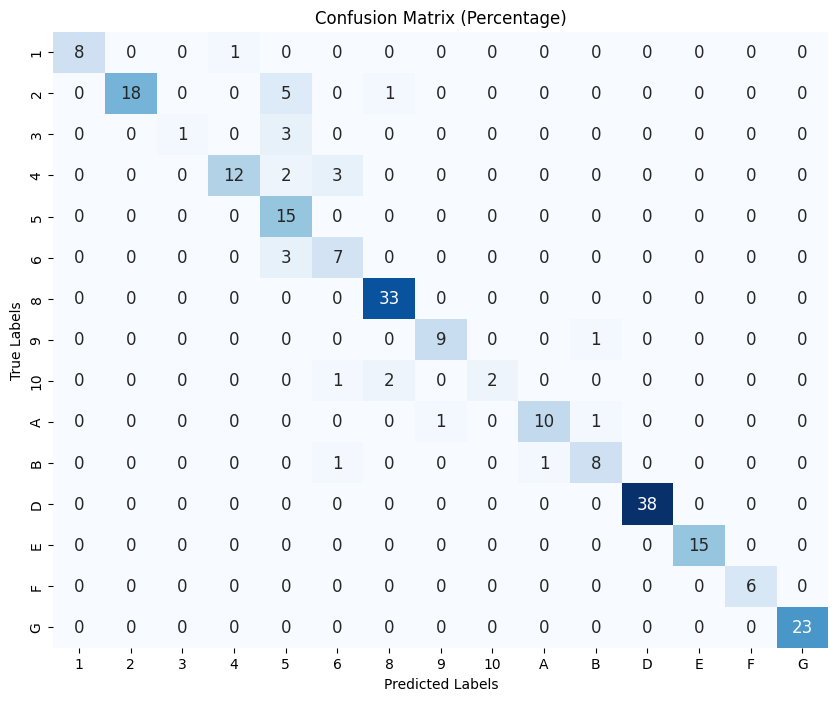

    1   2  3   4   5  6   8  9  10   A  B   D   E  F   G
1   8   0  0   1   0  0   0  0   0   0  0   0   0  0   0
2   0  18  0   0   5  0   1  0   0   0  0   0   0  0   0
3   0   0  1   0   3  0   0  0   0   0  0   0   0  0   0
4   0   0  0  12   2  3   0  0   0   0  0   0   0  0   0
5   0   0  0   0  15  0   0  0   0   0  0   0   0  0   0
6   0   0  0   0   3  7   0  0   0   0  0   0   0  0   0
8   0   0  0   0   0  0  33  0   0   0  0   0   0  0   0
9   0   0  0   0   0  0   0  9   0   0  1   0   0  0   0
10  0   0  0   0   0  1   2  0   2   0  0   0   0  0   0
A   0   0  0   0   0  0   0  1   0  10  1   0   0  0   0
B   0   0  0   0   0  1   0  0   0   1  8   0   0  0   0
D   0   0  0   0   0  0   0  0   0   0  0  38   0  0   0
E   0   0  0   0   0  0   0  0   0   0  0   0  15  0   0
F   0   0  0   0   0  0   0  0   0   0  0   0   0  6   0
G   0   0  0   0   0  0   0  0   0   0  0   0   0  0  23


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Display confusion matrix as a heatmap with count values
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels, cbar=False, annot_kws={"size": 12})


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Convert confusion matrix to pandas DataFrame
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Display the table as a formatted string for copying
table_string = df_cm.to_string(float_format="{:.2f}".format)
print(table_string)


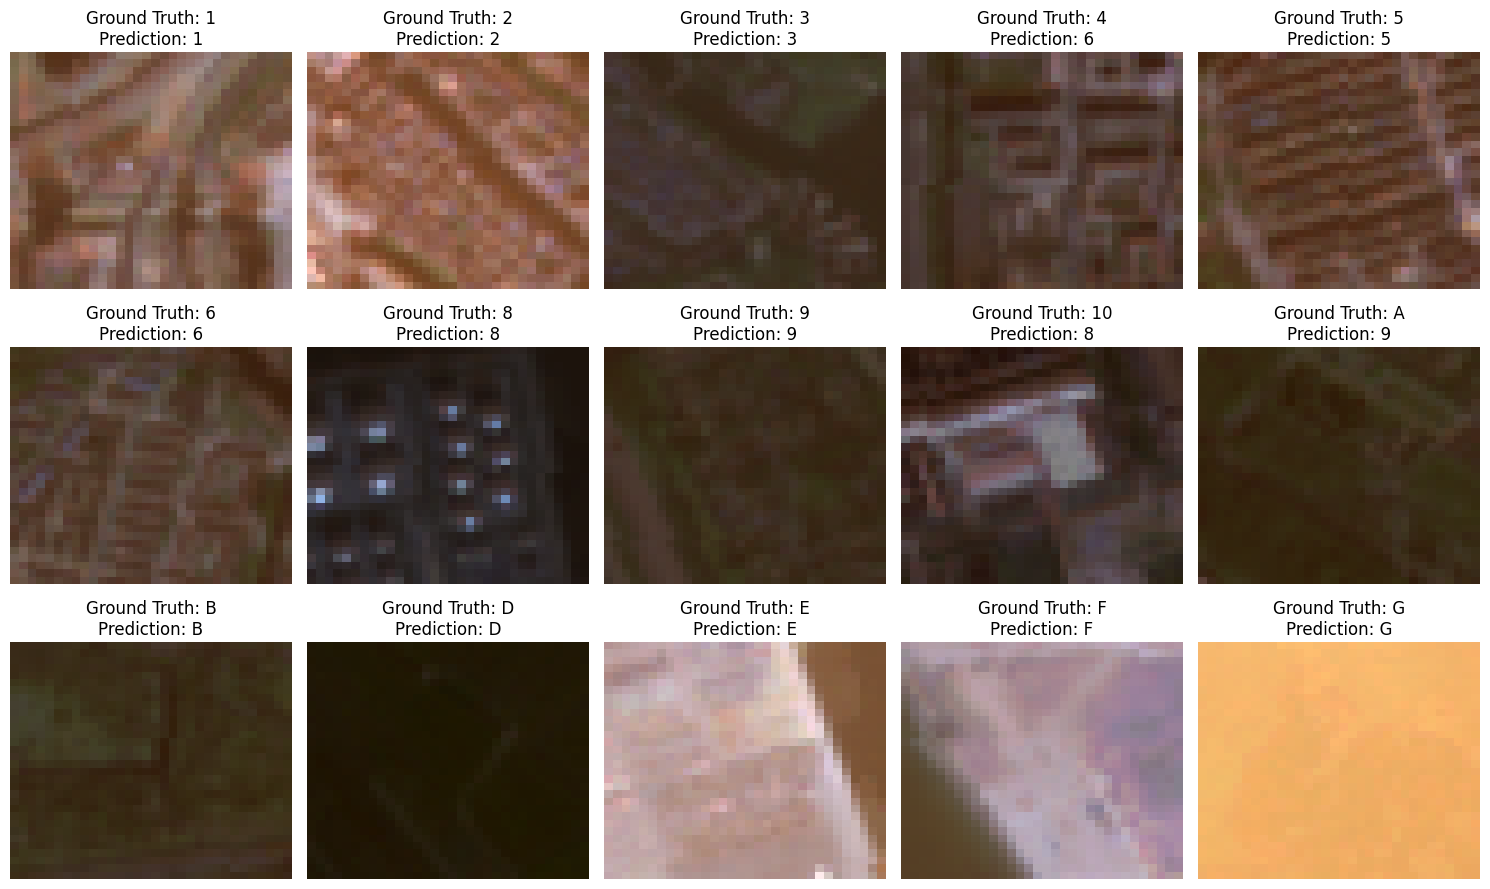

In [15]:
import matplotlib.pyplot as plt

# Make predictions using the loaded model
# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels if needed

# Select one sample per class label
selected_indices = []
for label in range(len(class_labels)):
    indices = np.where(y_test == label)[0]
    selected_index = np.random.choice(indices)
    selected_indices.append(selected_index)

# Create a 3x5 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

# Iterate over the selected samples and plot them
for i, index in enumerate(selected_indices):
    row_idx = i // 5
    col_idx = i % 5

    # Plot the image
    image = X_test[index]
    # Normalize intensity levels to 0-255 range
    image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    axes[row_idx, col_idx].imshow(image[:, :, :3].astype('uint8'), aspect='auto', interpolation='none')  # Display only the first three channels
    axes[row_idx, col_idx].set_title("Ground Truth: {}\nPrediction: {}".format(class_labels[y_test[index]], class_labels[y_pred[index]]))
    axes[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.show()


# EfficientNet

In [41]:
import tensorflow as tf

# Define the input shape
input_shape = (32, 32, 10)

# Create a new input layer
input_layer = Input(shape=input_shape)

# Load the ResNet50 model, using the new input layer
efficientnet_model = EfficientNetB7(include_top=False, weights=None, input_tensor=input_layer, classes=15)

#X_train = preprocess_input(X_train)

# Add the Rescaling layer to the top
model = tf.keras.Sequential([
    efficientnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='softmax')
])

# Build the model
model.build(input_shape=(None, 32, 32, 10))  # Replace height, width, and channels with the appropriate values

# Print the model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 1, 1, 2560)       64101733  
                                                                 
 global_average_pooling2d_9   (None, 2560)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 128)               327808    
                                                                 
 dense_19 (Dense)            (None, 15)                1935      
                                                                 
Total params: 64,431,476
Trainable params: 64,120,735
Non-trainable params: 310,741
_________________________________________________________________


In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Rescaling
from tensorflow.keras.applications.efficientnet import EfficientNetB7
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

#from tensorflow.keras.applications.resnet50 import preprocess_input

# Define the input shape
input_shape = (32, 32, 10)

# Create a new input layer
input_layer = Input(shape=input_shape)

# Load the ResNet50 model, using the new input layer
efficientnet_model = EfficientNetB7(include_top=False, weights=None, input_tensor=input_layer, classes=15)

#X_train = preprocess_input(X_train)

# Add the Rescaling layer to the top
model = tf.keras.Sequential([
    efficientnet_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=15, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=450, verbose=1)
checkpoint = ModelCheckpoint('weights_efficientnet.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

# Create an instance of the ImageDataGenerator class
datagen = ImageDataGenerator(
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Fit the generator on your training data
datagen.fit(X_train)

# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=500,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint]
)

# Save the trained model
model.save('model_efficientnet')

# Load the best weights
model.load_weights('model_efficientnet.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Best Model Test accuracy:', test_acc)


Epoch 1/500


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:1874: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (1072, 32, 32, 10) (10 channels).
  warnings.warn('Expected input to be images (as Numpy array) '
/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:680: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (1072, 32, 32, 10) (10 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


34/34 [==============================] - ETA: 0s - loss: 2.6551 - accuracy: 0.2323
Epoch 1: val_accuracy improved from -inf to 0.08734, saving model to weights_efficientnet.h5
34/34 [==============================] - 64s 746ms/step - loss: 2.6551 - accuracy: 0.2323 - val_loss: 2.6520 - val_accuracy: 0.0873
Epoch 2/500
34/34 [==============================] - ETA: 0s - loss: 2.2534 - accuracy: 0.2985
Epoch 2: val_accuracy did not improve from 0.08734
34/34 [==============================] - 8s 236ms/step - loss: 2.2534 - accuracy: 0.2985 - val_loss: 2.8392 - val_accuracy: 0.0568
Epoch 3/500
34/34 [==============================] - ETA: 0s - loss: 2.1545 - accuracy: 0.3088
Epoch 3: val_accuracy improved from 0.08734 to 0.11790, saving model to weights_efficientnet.h5
34/34 [==============================] - 20s 611ms/step - loss: 2.1545 - accuracy: 0.3088 - val_loss: 2.6702 - val_accuracy: 0.1179
Epoch 4/500
34/34 [==============================] - ETA: 0s - loss: 2.0322 - accuracy: 0.36

INFO:tensorflow:Assets written to: model_efficientnet/assets


INFO:tensorflow:Assets written to: model_efficientnet/assets


FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'model_efficientnet.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

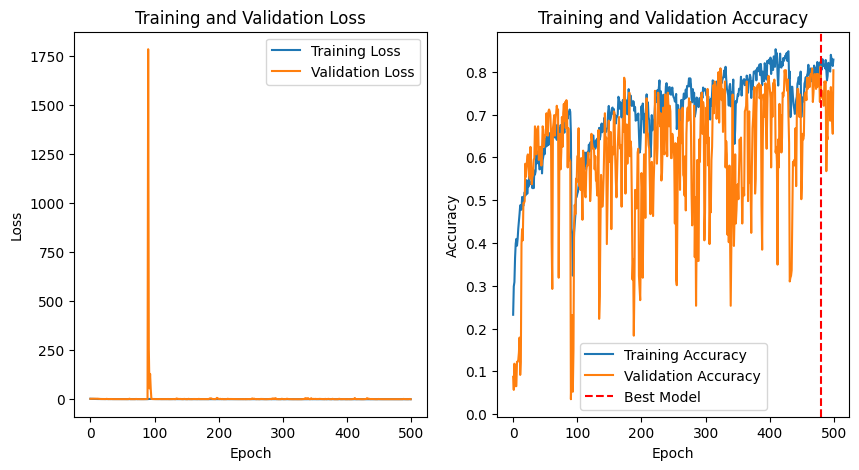

best epoch accuracy:  0.8122270703315735
best epoch number:  479


In [ ]:
import matplotlib.pyplot as plt

# Retrieve the best epoch value
best_epoch = checkpoint.best

# Find the index of the maximum validation accuracy
best_epoch_index = np.argmax(history.history['val_accuracy'])

import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

# Plot the training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax2.axvline(x=best_epoch_index, color='red', linestyle='--', label='Best Model')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Show the plots
plt.show()

print('best epoch accuracy: ', best_epoch)
print('best epoch number: ', best_epoch_index)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Assuming you have already created a graph and displayed it in Jupyter Notebook
# Save the current figure
plt.savefig('graph_image.png')


<Figure size 640x480 with 0 Axes>

In [16]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('lcz_model_bestweight_effinet2')

# Load the best weights
model.load_weights('best_model_weights_effinet2.h5')

In [21]:
# Generate predictions for the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the overall accuracy
correct_predictions = np.sum(y_pred == y_test)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

print("Overall Accuracy on Test Set:", accuracy)


8/8 [==============================] - 10s 71ms/step
Overall Accuracy on Test Set: 0.7878787878787878


In [22]:
from sklearn.metrics import classification_report

# Calculate classification metrics
classification_metrics = classification_report(y_test, y_pred)

print(classification_metrics)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.75      0.62      0.68        24
           2       0.00      0.00      0.00         4
           3       0.73      0.65      0.69        17
           4       0.50      0.93      0.65        15
           5       0.67      0.40      0.50        10
           6       0.68      0.70      0.69        33
           7       1.00      0.80      0.89        10
           8       0.14      0.20      0.17         5
           9       0.86      1.00      0.92        12
          10       0.80      0.80      0.80        10
          11       1.00      1.00      1.00        38
          12       0.93      0.93      0.93        15
          13       1.00      0.83      0.91         6
          14       1.00      1.00      1.00        23

    accuracy                           0.79       231
   macro avg       0.72      0.70      0.70       231
weighted avg       0.80   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/tmp/ipykernel_280/2766485175.py:21: RuntimeWarning: invalid value encountered in divide
  false_positive_rates = false_positives / np.sum(cm, axis=0)


Accuracy for 1: 0.6666666666666666
Accuracy for 2: 0.625
Accuracy for 3: 0.0
Accuracy for 4: 0.6470588235294118
Accuracy for 5: 0.9333333333333333
Accuracy for 6: 0.4
Accuracy for 8: 0.696969696969697
Accuracy for 9: 0.8
Accuracy for 10: 0.2
Accuracy for A: 1.0
Accuracy for B: 0.8
Accuracy for D: 1.0
Accuracy for E: 0.9333333333333333
Accuracy for F: 0.8333333333333334
Accuracy for G: 1.0
Total Accuracy: 0.7878787878787878
False positive rate for 1: 0.25
False negative rate for 1: 0.3333333333333333
True positive rate for 1: 0.6666666666666666
True negative rate for 1: 0.9523809523809523

False positive rate for 2: 0.25
False negative rate for 2: 0.375
True positive rate for 2: 0.625
True negative rate for 2: 0.8744588744588745

False positive rate for 3: nan
False negative rate for 3: 1.0
True positive rate for 3: 0.0
True negative rate for 3: 0.9826839826839827

False positive rate for 4: 0.26666666666666666
False negative rate for 4: 0.35294117647058826
True positive rate for 4: 0.6

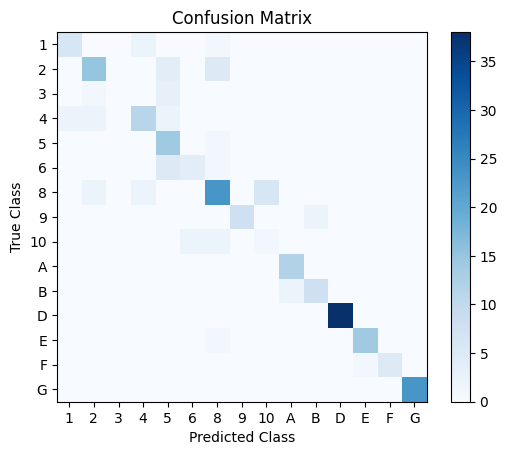

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy for each class
class_accuracy = cm.diagonal() / cm.sum(axis=1)

# Calculate total accuracy
total_accuracy = np.trace(cm) / np.sum(cm)

# Calculate false positives, false negatives, true positives, and true negatives
false_positives = np.sum(cm, axis=0) - np.diag(cm)
false_negatives = np.sum(cm, axis=1) - np.diag(cm)
true_positives = np.diag(cm)
true_negatives = np.sum(cm) - (false_positives + false_negatives + true_positives)

# Calculate percentages of false positives, false negatives, true positives, and true negatives
false_positive_rates = false_positives / np.sum(cm, axis=0)
false_negative_rates = false_negatives / np.sum(cm, axis=1)
true_positive_rates = true_positives / np.sum(cm, axis=1)
true_negative_rates = true_negatives / np.sum(cm)

# Print the accuracy for each class
for i, label in enumerate(class_labels):
    print(f"Accuracy for {label}: {class_accuracy[i]}")

# Print the total accuracy
print(f"Total Accuracy: {total_accuracy}")

# Print the percentages of false positives, false negatives, true positives, and true negatives for each class
for i, label in enumerate(class_labels):
    print(f"False positive rate for {label}: {false_positive_rates[i]}")
    print(f"False negative rate for {label}: {false_negative_rates[i]}")
    print(f"True positive rate for {label}: {true_positive_rates[i]}")
    print(f"True negative rate for {label}: {true_negative_rates[i]}")
    print()

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


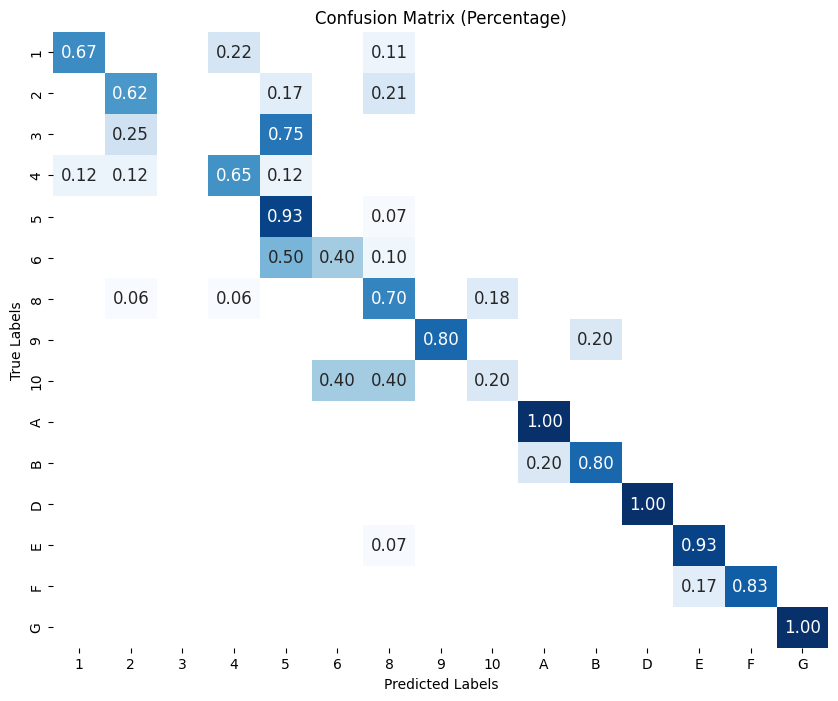

      1    2    3    4    5    6    8    9   10    A    B    D    E    F    G
1  0.67 0.00 0.00 0.22 0.00 0.00 0.11 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
2  0.00 0.62 0.00 0.00 0.17 0.00 0.21 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
3  0.00 0.25 0.00 0.00 0.75 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
4  0.12 0.12 0.00 0.65 0.12 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
5  0.00 0.00 0.00 0.00 0.93 0.00 0.07 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
6  0.00 0.00 0.00 0.00 0.50 0.40 0.10 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
8  0.00 0.06 0.00 0.06 0.00 0.00 0.70 0.00 0.18 0.00 0.00 0.00 0.00 0.00 0.00
9  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.80 0.00 0.00 0.20 0.00 0.00 0.00 0.00
10 0.00 0.00 0.00 0.00 0.00 0.40 0.40 0.00 0.20 0.00 0.00 0.00 0.00 0.00 0.00
A  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0.00 0.00 0.00 0.00 0.00
B  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.20 0.80 0.00 0.00 0.00 0.00
D  0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 1.00 0

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix to get percentages
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


# Display confusion matrix as a heatmap with percentage values
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, cmap="Blues", fmt=".2f", xticklabels=class_labels, yticklabels=class_labels, cbar=False, annot_kws={"size": 12}, mask=(cm_normalized == 0))


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Convert confusion matrix to pandas DataFrame
df_cm = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)

# Display the table as a formatted string for copying
table_string = df_cm.to_string(float_format="{:.2f}".format)
print(table_string)

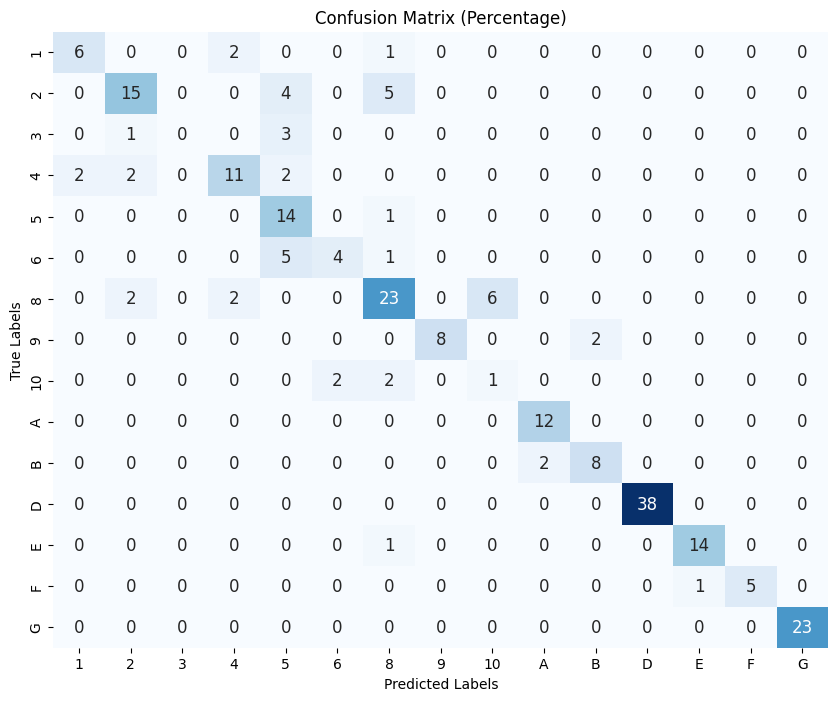

    1   2  3   4   5  6   8  9  10   A  B   D   E  F   G
1   6   0  0   2   0  0   1  0   0   0  0   0   0  0   0
2   0  15  0   0   4  0   5  0   0   0  0   0   0  0   0
3   0   1  0   0   3  0   0  0   0   0  0   0   0  0   0
4   2   2  0  11   2  0   0  0   0   0  0   0   0  0   0
5   0   0  0   0  14  0   1  0   0   0  0   0   0  0   0
6   0   0  0   0   5  4   1  0   0   0  0   0   0  0   0
8   0   2  0   2   0  0  23  0   6   0  0   0   0  0   0
9   0   0  0   0   0  0   0  8   0   0  2   0   0  0   0
10  0   0  0   0   0  2   2  0   1   0  0   0   0  0   0
A   0   0  0   0   0  0   0  0   0  12  0   0   0  0   0
B   0   0  0   0   0  0   0  0   0   2  8   0   0  0   0
D   0   0  0   0   0  0   0  0   0   0  0  38   0  0   0
E   0   0  0   0   0  0   1  0   0   0  0   0  14  0   0
F   0   0  0   0   0  0   0  0   0   0  0   0   1  5   0
G   0   0  0   0   0  0   0  0   0   0  0   0   0  0  23


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Display confusion matrix as a heatmap with count values
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=class_labels, yticklabels=class_labels, cbar=False, annot_kws={"size": 12})


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage)')
plt.show()

# Convert confusion matrix to pandas DataFrame
df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Display the table as a formatted string for copying
table_string = df_cm.to_string(float_format="{:.2f}".format)
print(table_string)


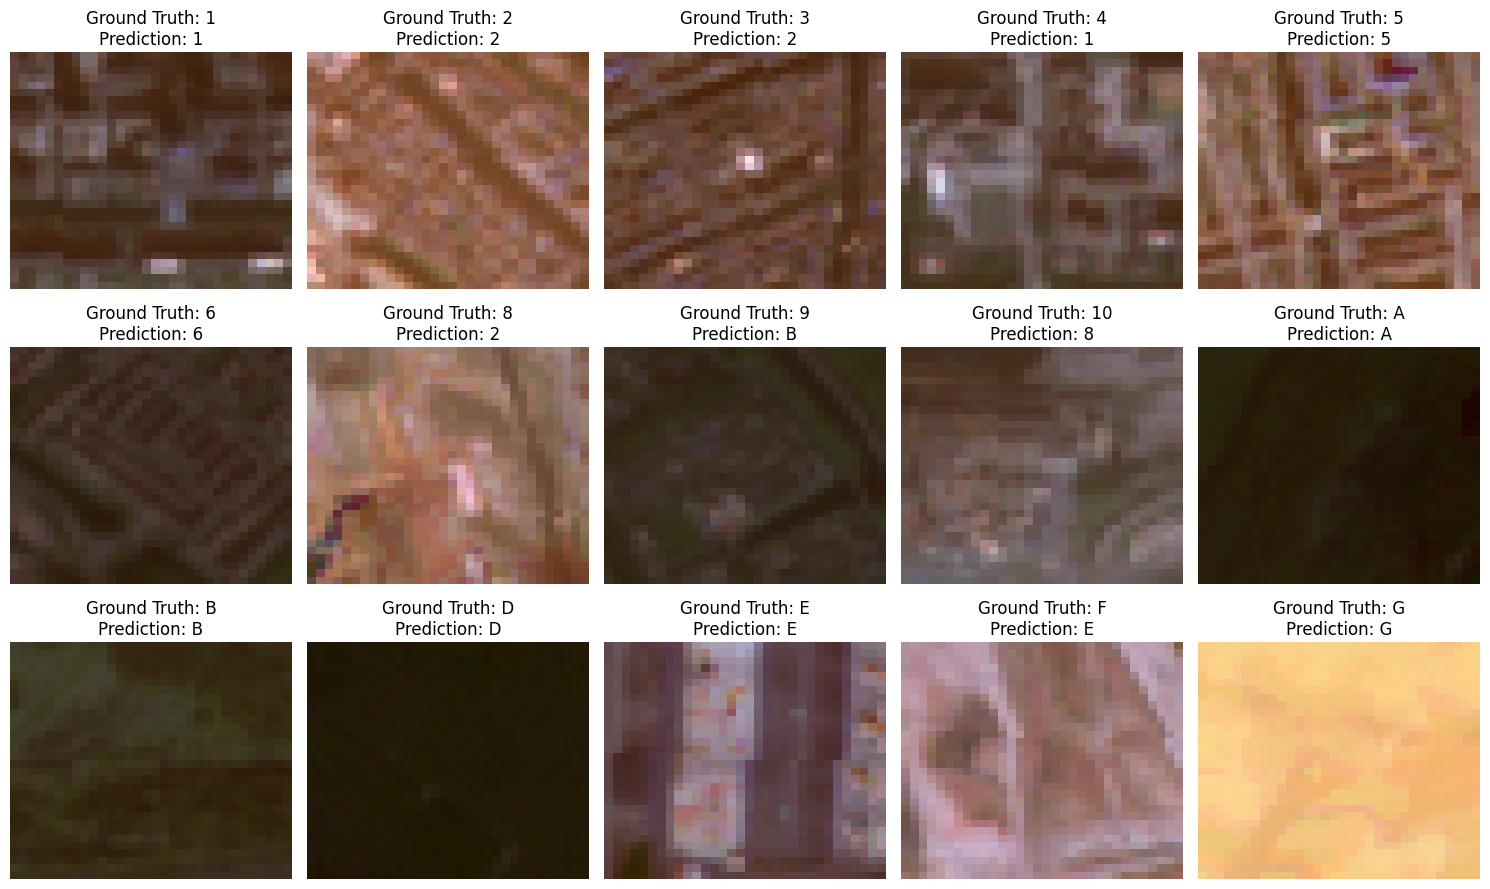

In [26]:
import matplotlib.pyplot as plt

# Make predictions using the loaded model
# y_pred = model.predict(X_test)
# y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels if needed

# Select one sample per class label
selected_indices = []
for label in range(len(class_labels)):
    indices = np.where(y_test == label)[0]
    selected_index = np.random.choice(indices)
    selected_indices.append(selected_index)

# Create a 3x5 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

# Iterate over the selected samples and plot them
for i, index in enumerate(selected_indices):
    row_idx = i // 5
    col_idx = i % 5

    # Plot the image
    image = X_test[index]
    # Normalize intensity levels to 0-255 range
    image = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255
    axes[row_idx, col_idx].imshow(image[:, :, :3].astype('uint8'), aspect='auto', interpolation='none')  # Display only the first three channels
    axes[row_idx, col_idx].set_title("Ground Truth: {}\nPrediction: {}".format(class_labels[y_test[index]], class_labels[y_pred[index]]))
    axes[row_idx, col_idx].axis("off")

plt.tight_layout()
plt.show()
